In [12]:
import numpy as np
import matplotlib.pyplot as plt


[2.20049536e-02 4.40096871e-02 2.33224264e-02 8.80409338e-04
 1.98016691e-02 6.94193152e-06 2.75540193e-02 5.51080387e-02
 1.54302508e-02 1.10216077e-03]


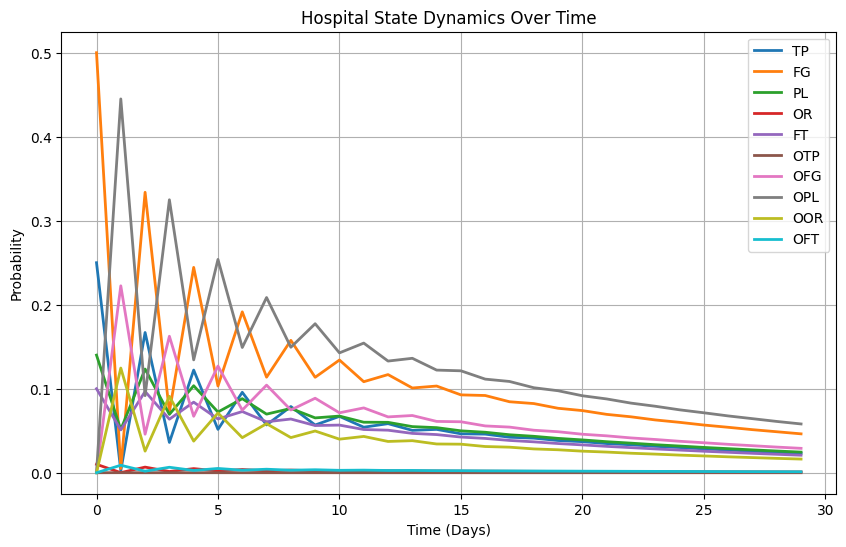

In [13]:
# Simulating a basketball game


# Three pointer, field goal, pocession lost, free throw, opponent three, opponent field goal, 
# opponenent pocession lost, opponent offensive rebound, opponent free throw
states = ["TP", "FG", "PL", "OR", "FT", "OTP", "OFG", "OPL", "OOR", "OFT"]
probabilities = np.array([0.25, 0.5, 0.14, 0.01, 0.1, 0, 0, 0, 0, 0])  


transition_matrix = np.array([
    # TP    FG    PL    OR    FT   OTP  OFG  OPL  OOR  OFT
    [0,  0,  0,  0,  0, 0.0001, 0.25, 0.5, 0.14, 0.01],  # TP
    [0,  0,  0,  0,  0, 0.0001, 0.25, 0.5, 0.14, 0.01],  # FG
    [0,  0,  0,  0,  0, 0, 0.25, 0.5, 0.14, 0.01],  # PL
    [0.25, 0.5, 0.14, 0.01, 0.1, 0, 0, 0, 0, 0],  # OR
    [0.00001, 0.00001, 0.5, 0.00001, 0.5, 0, 0, 0, 0, 0],  # FT 
    [0.25, 0.5, 0.14, 0.01, 0.1, 0, 0, 0, 0, 0], # OTP
    [0.25, 0.5, 0.14, 0.01, 0.1, 0, 0, 0, 0, 0], # OFG
    [0.25, 0.5, 0.14, 0.01, 0.1, 0, 0, 0, 0, 0], # OPL
    [0,  0,  0,  0,  0, 0, 0.25, 0.5, 0.14, 0.01], # OOR
    [0.00001, 0.00001, 0.5, 0.00001, 0.5, 0, 0, 0, 0, 0] # OFT
])

# Evolving over time 
time = 30 
history = np.zeros((time, len(states)))

for i in range(time): 
    history[i] = probabilities
    probabilities = probabilities @ transition_matrix

print(probabilities)
plt.figure(figsize=(10, 6))
for i, state in enumerate(states):
    plt.plot(range(time), history[:, i], label=state, linewidth=2)

plt.xlabel("Time (Days)")
plt.ylabel("Probability")
plt.title("Hospital State Dynamics Over Time")
plt.legend()
plt.grid(True)
plt.show()